In [40]:
import pandas as pd
import numpy as np 
import matplotlib

### Getting the data

In [18]:
prices = pd.read_csv("C:/Users/OMAR/Desktop/Randa/Investment-Management-with-Python-and-ML/data/sample_prices.csv")
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


### Prices changes

In [19]:
returns = prices.pct_change().dropna()
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [20]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

### Volatility

In [25]:
n_obs=returns.shape[0]
deviation = returns - returns.mean()
squared_deviation = deviation**2 
variance = squared_deviation.sum()/(n_obs-1)
standard_deviation = (variance)**0.5
standard_deviation

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [26]:
annualised_volatility = standard_deviation*np.sqrt(12)
annualised_volatility

BLUE      0.083060
ORANGE    0.275747
dtype: float64

### Portfolio returns

In [41]:
portfolio_returns = pd.read_csv("C:/Users/OMAR/Desktop/Randa/Investment-Management-with-Python-and-ML/data/Portfolios_Formed_on_ME_monthly_EW.csv"
                                , header=0
                                , index_col=0 
                                , parse_dates=True
                                , na_values=-99.99)
portfolio_returns.head()

C:\Users\OMAR\AppData\Local\Temp\ipykernel_11044\2526051315.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_returns = pd.read_csv("C:/Users/OMAR/Desktop/Randa/Investment-Management-with-Python-and-ML/data/Portfolios_Formed_on_ME_monthly_EW.csv"


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [42]:
# return percentage converted 

to_select = ['Lo 10', 'Hi 10']
returns_to_check = portfolio_returns[to_select]/100
returns_to_check.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


#### Lowest and Highest 10%

<Axes: >

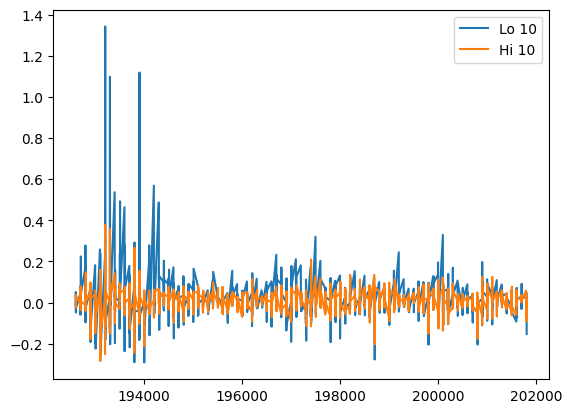

In [45]:
returns_to_check.plot()

### Portfolio returns

In [48]:
annualised_vol = returns_to_check.std()*np.sqrt(12)
annualised_vol

Lo 10    0.368193
Hi 10    0.186716
dtype: float64

In [54]:
num_months = returns_to_check.shape[0]
return_per_month = (returns_to_check+1).prod()**(1/num_months) - 1
annualised_return = (return_per_month+1)**12 - 1
print(annualised_return)

## another method
annualised_return = (returns_to_check+1).prod()**(12/num_months) - 1
print(annualised_return)

Lo 10    0.167463
Hi 10    0.092810
dtype: float64
Lo 10    0.167463
Hi 10    0.092810
dtype: float64


In [55]:
annualised_return/annualised_vol

Lo 10    0.454825
Hi 10    0.497063
dtype: float64

In [57]:
## Adjusting to riskfree rate 

riskfree_rate = 0.03
(annualised_return-riskfree_rate)/annualised_vol

Lo 10    0.373346
Hi 10    0.336392
dtype: float64

#### Quantiles return

<Axes: >

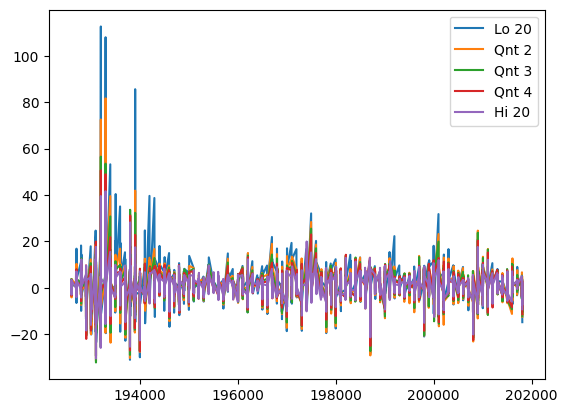

In [60]:
portfolio_returns[['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']].plot()